## Importing the important libraries for the analysis 

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import scipy.stats as Pearsonr
import scipy.stats as spearmanr
import statsmodels.api as sm
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

## Loading the data set 

In [12]:
HAD_data=pd.read_excel('final presentation.xlsx')
HAD_data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001e+16,261404,31251232725295400,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459e+15,285768,271949733519874,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426e+15,235282,28176570683909800,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981e+15,125640,36464704293082800,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821e+16,160555,21809144180619700,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,1.080637e+16,235420,1965589452538690,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038e+16,217881,23993866102650500,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214e+16,36998,3540614615890450,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,2.910426e-02,209943,2729402008767080,114,2,8,Brazil,South America,Southern Hemisphere,0


# Selecting only the most relevant columns to reduce the quantity of data to work with 

In [18]:
selected_columns = [
    'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'BMI', 'Heart Rate', 
    'Smoking', 'Exercise Hours Per Week', 'Alcohol Consumption', 
    'Diabetes', 'Previous Heart Problems', 'Family History', 
    'Medication Use', 'Heart Attack Risk'
]


In [20]:
HAD_data_reduced = HAD_data[selected_columns]

In [24]:
HAD_data_reduced

,Age,Sex,Cholesterol,Blood Pressure,BMI,Heart Rate,Smoking,Exercise Hours Per Week,Alcohol Consumption,Diabetes,Previous Heart Problems,Family History,Medication Use,Heart Attack Risk
0,67,Male,208,158/88,31251232725295400,72,1,4.168189e+15,0,0,0,0,0,0
1,21,Male,389,165/93,271949733519874,98,1,1.813242e+16,1,1,1,1,0,0
2,21,Female,324,174/99,28176570683909800,72,0,2.078353e+16,0,1,1,0,1,0
3,84,Male,383,163/100,36464704293082800,73,1,9.828130e+14,1,1,1,1,0,0
4,66,Male,318,91/88,21809144180619700,93,1,5.804299e+15,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,1965589452538690,61,1,7.917342e+15,1,1,1,1,1,0
8759,28,Female,120,157/102,23993866102650500,73,0,1.655843e+14,0,1,0,0,0,0
8760,47,Male,250,161/75,3540614615890450,105,1,3.148438e+16,1,0,1,1,0,1
8761,36,Male,178,119/67,2729402008767080,60,1,3.789950e+16,0,1,1,0,1,0


## Inspecting the structure of the data

In [27]:
HAD_data_reduced.shape

(8763, 14)

There are a total of 14 columns on the data frame and 8763 rows

In [188]:
 HAD_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      8763 non-null   int64   
 1   Sex                      8763 non-null   category
 2   Cholesterol              8763 non-null   int64   
 3   Blood Pressure           0 non-null      category
 4   BMI                      8763 non-null   int64   
 5   Heart Rate               8763 non-null   int64   
 6   Smoking                  8763 non-null   int64   
 7   Exercise Hours Per Week  8763 non-null   float64 
 8   Alcohol Consumption      8763 non-null   int64   
 9   Diabetes                 8763 non-null   int64   
 10  Previous Heart Problems  8763 non-null   int64   
 11  Family History           8763 non-null   int64   
 12  Medication Use           8763 non-null   int64   
 13  Heart Attack Risk        8763 non-null   int64   
 14  Systolic

The data type for all columns are numerical 

In [34]:
HAD_data_reduced.describe()

,Age,Cholesterol,BMI,Heart Rate,Smoking,Exercise Hours Per Week,Alcohol Consumption,Diabetes,Previous Heart Problems,Family History,Medication Use,Heart Attack Risk
count,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,1.538209e+16,75.021682,0.896839,1.124363e+16,0.598083,0.652288,0.495835,0.492982,0.498345,0.358211
std,21.249509,80.863276,1.296107e+16,20.550948,0.304186,1.102054e+16,0.490313,0.476271,0.500011,0.499979,0.500026,0.479502
min,18.000000,120.000000,2.354296e+11,40.000000,0.000000,2.442348e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,192.000000,3.105958e+15,57.000000,1.000000,3.119313e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,259.000000,1.846338e+16,75.000000,1.000000,9.839877e+15,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,330.000000,2.716360e+16,93.000000,1.000000,1.545300e+16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,400.000000,3.998992e+16,110.000000,1.000000,7.972335e+16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for missing values 

In [41]:
missing_values = HAD_data_reduced.isnull().sum()
missing_values

Age                        0
Sex                        0
Cholesterol                0
Blood Pressure             0
BMI                        0
Heart Rate                 0
Smoking                    0
Exercise Hours Per Week    0
Alcohol Consumption        0
Diabetes                   0
Previous Heart Problems    0
Family History             0
Medication Use             0
Heart Attack Risk          0
dtype: int64

There are no missing values 

## Checking Data Types, if need for conversions

In [55]:
print(HAD_data_reduced.dtypes)

Age                          int64
Sex                         object
Cholesterol                  int64
Blood Pressure              object
BMI                          int64
Heart Rate                   int64
Smoking                      int64
Exercise Hours Per Week    float64
Alcohol Consumption          int64
Diabetes                     int64
Previous Heart Problems      int64
Family History               int64
Medication Use               int64
Heart Attack Risk            int64
dtype: object


# Converting 'Sex', 'Blood Pressure' to categorical

In [68]:
HAD_data['Sex'] = HAD_data_reduced['Sex'].astype('category')

HAD_data[['Systolic', 'Diastolic']] = HAD_data_reduced['Blood Pressure'].str.split('/', expand=True)
HAD_data_reduced.loc[:, 'Systolic'] = HAD_data_reduced['Systolic'].astype(int)
HAD_data_reduced.loc[:, 'Diastolic'] = HAD_data_reduced['Diastolic'].astype(int)

In [72]:
HAD_data_reduced.dtypes

Age                           int64
Sex                        category
Cholesterol                   int64
Blood Pressure               object
BMI                           int64
Heart Rate                    int64
Smoking                       int64
Exercise Hours Per Week     float64
Alcohol Consumption           int64
Diabetes                      int64
Previous Heart Problems       int64
Family History                int64
Medication Use                int64
Heart Attack Risk             int64
Systolic                     object
Diastolic                    object
dtype: object

In [84]:
blood_pressure_categories = ["Normal", "Elevated", "High Stage 1", "High Stage 2", "Hypertensive Crisis"]


HAD_data['Blood Pressure'] = pd.Categorical(HAD_data['Blood Pressure'], categories=blood_pressure_categories)

HAD_data['Systolic'] = HAD_data['Systolic'].astype(int)
HAD_data['Diastolic'] = HAD_data['Diastolic'].astype(int)

print(HAD_data_reduced.dtypes)

Age                           int64
Sex                        category
Cholesterol                   int64
Blood Pressure             category
BMI                           int64
Heart Rate                    int64
Smoking                       int64
Exercise Hours Per Week     float64
Alcohol Consumption           int64
Diabetes                      int64
Previous Heart Problems       int64
Family History                int64
Medication Use                int64
Heart Attack Risk             int64
Systolic                     object
Diastolic                    object
dtype: object


## Comparative Analysis 

 Comparative analysis of all factors as a risk for heart attack, we will create AGE group 
and also categorise Excercise Levels and Alchohol consumption before visualising using Countplot

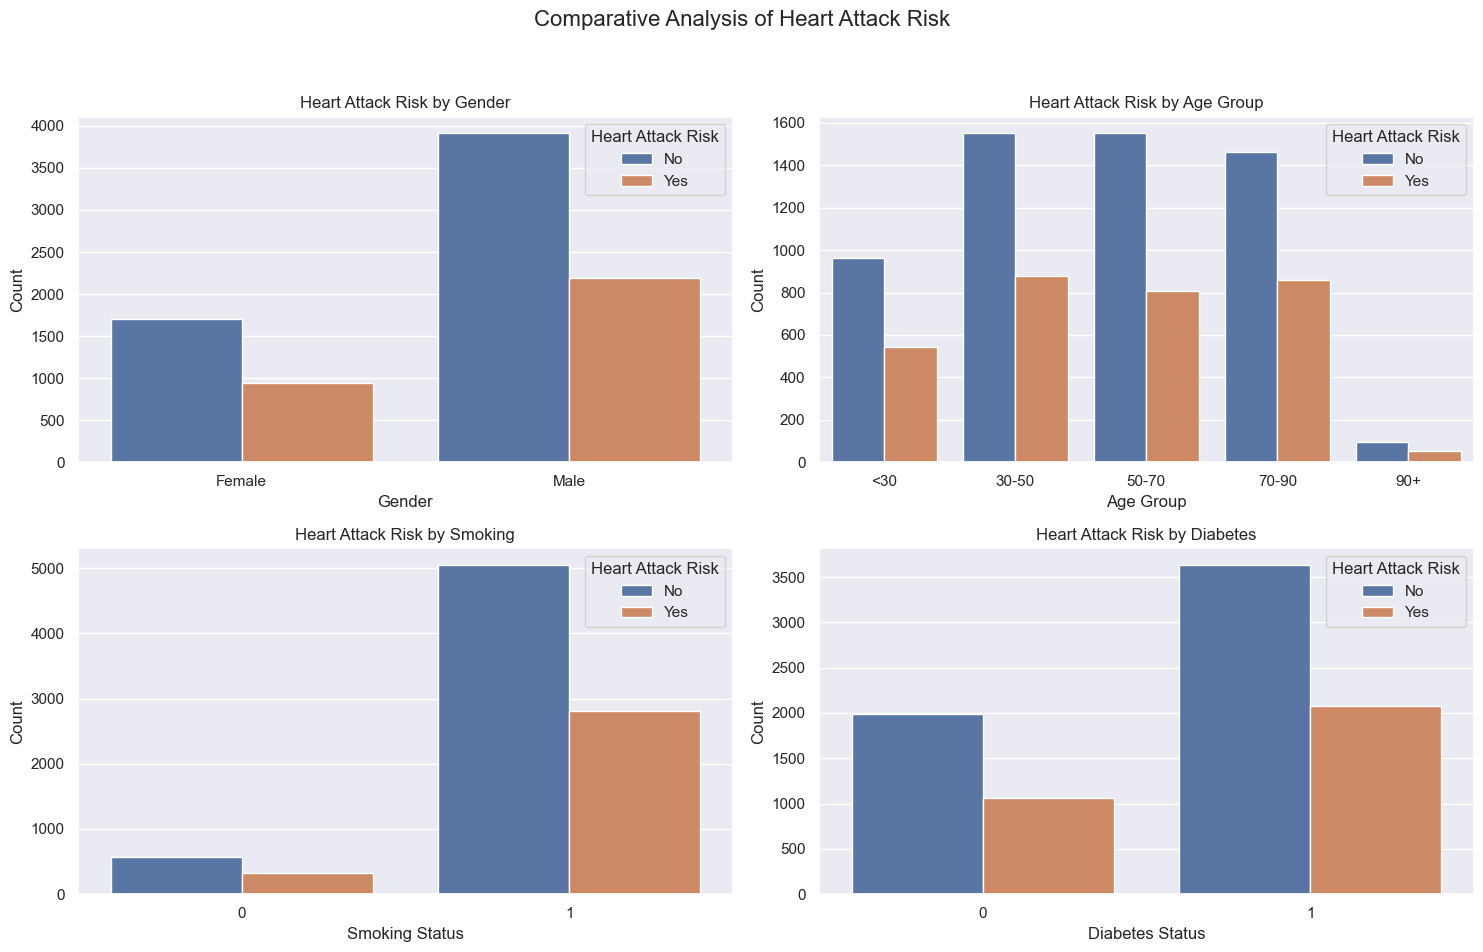

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparative Analysis of Heart Attack Risk', fontsize=16)

# a. Gender Comparison of Heart Attack Risk
sns.countplot(data=HAD_data, x='Sex', hue='Heart Attack Risk', ax=axs[0, 0])
axs[0, 0].set_title('Heart Attack Risk by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend(title='Heart Attack Risk', loc='upper right', labels=['No', 'Yes'])

# b. Age Groups Comparison of Heart Attack Risk
bins = [0, 30, 50, 70, 90, 100]
labels = ['<30', '30-50', '50-70', '70-90', '90+']
HAD_data['Age Group'] = pd.cut(HAD_data['Age'], bins=bins, labels=labels, right=False)
sns.countplot(data=HAD_data, x='Age Group', hue='Heart Attack Risk', ax=axs[0, 1])
axs[0, 1].set_title('Heart Attack Risk by Age Group')
axs[0, 1].set_xlabel('Age Group')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend(title='Heart Attack Risk', loc='upper right', labels=['No', 'Yes'])

# c. Smoking Status Comparison of Heart Attack Risk
sns.countplot(data=HAD_data, x='Smoking', hue='Heart Attack Risk', ax=axs[1, 0])
axs[1, 0].set_title('Heart Attack Risk by Smoking')
axs[1, 0].set_xlabel('Smoking Status')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend(title='Heart Attack Risk', loc='upper right', labels=['No', 'Yes'])

# d. Diabetes Status Comparison of Heart Attack Risk
sns.countplot(data=HAD_data, x='Diabetes', hue='Heart Attack Risk', ax=axs[1, 1])
axs[1, 1].set_title('Heart Attack Risk by Diabetes')
axs[1, 1].set_xlabel('Diabetes Status')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(title='Heart Attack Risk', loc='upper right', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to accommodate the title
plt.show()

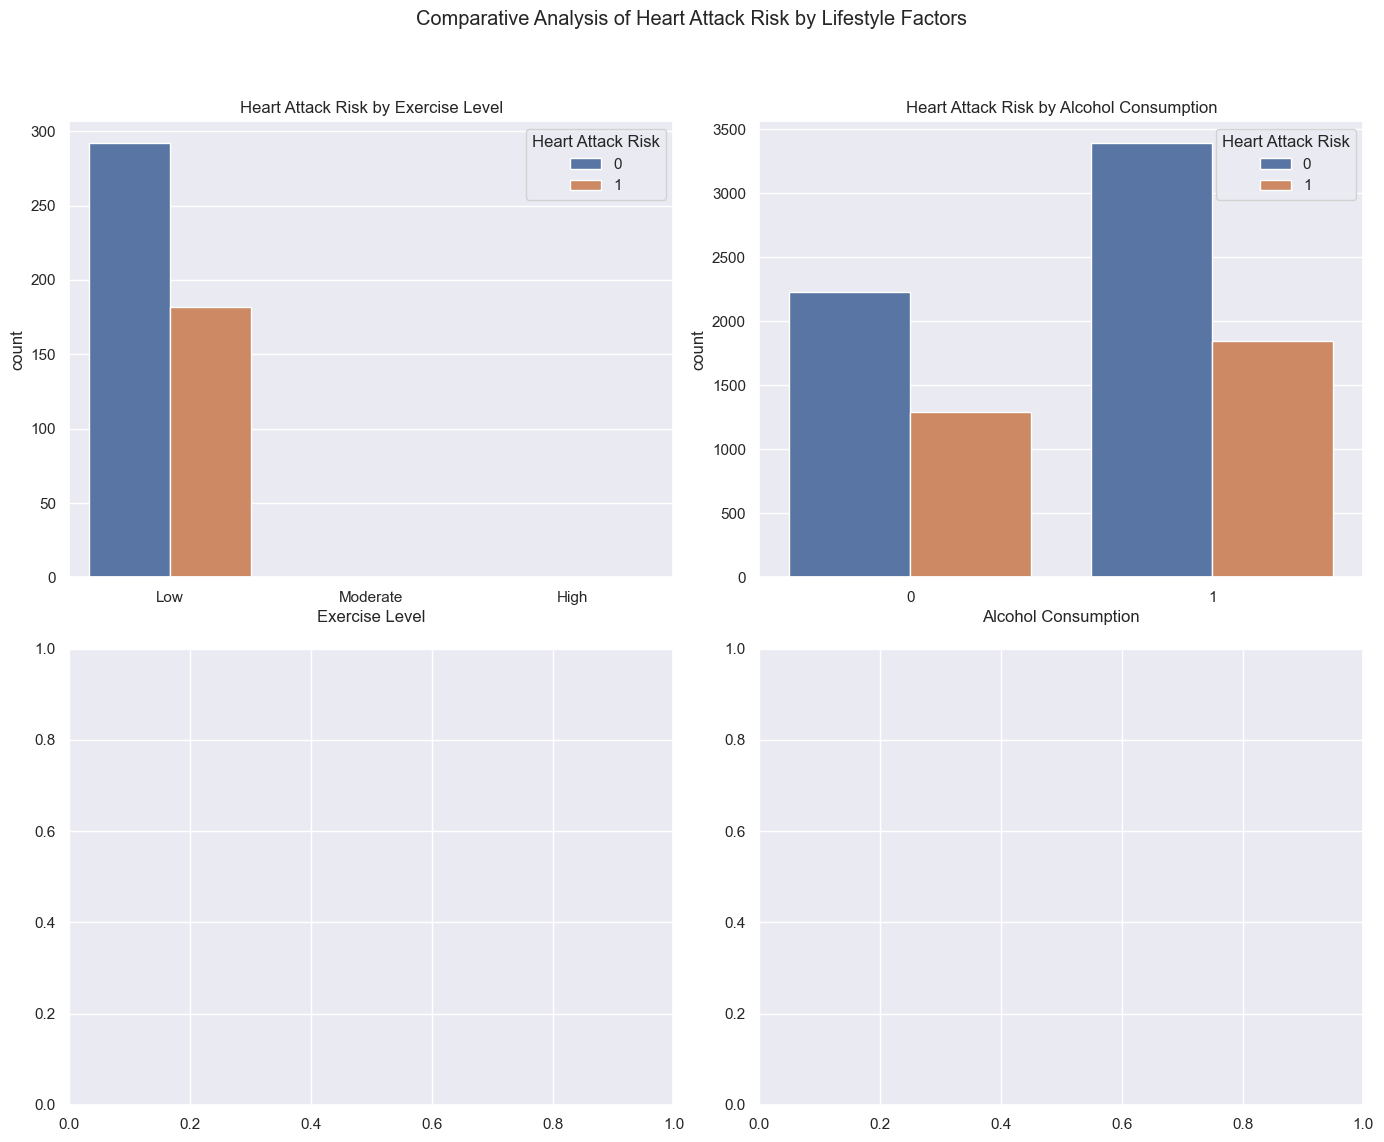

In [152]:
HAD_data['Exercise Level'] = pd.cut(HAD_data_reduced['Exercise Hours Per Week'], bins=[0, 3, 7, 20], labels=['Low', 'Moderate', 'High'])

# Add another row of subplots if desired
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Comparative Analysis of Heart Attack Risk by Lifestyle Factors")

# 1. Exercise Level Comparison
sns.countplot(x='Exercise Level', hue='Heart Attack Risk', data=HAD_data_reduced, ax=axes[0, 0])
axes[0, 0].set_title("Heart Attack Risk by Exercise Level")

# 2. Alcohol Consumption Comparison
sns.countplot(x='Alcohol Consumption', hue='Heart Attack Risk', data=HAD_data_reduced, ax=axes[0, 1])
axes[0, 1].set_title("Heart Attack Risk by Alcohol Consumption")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Trend analysis 
highlighting how continuous variables like age and exercise impact heart health, guiding prevention and intervention efforts.

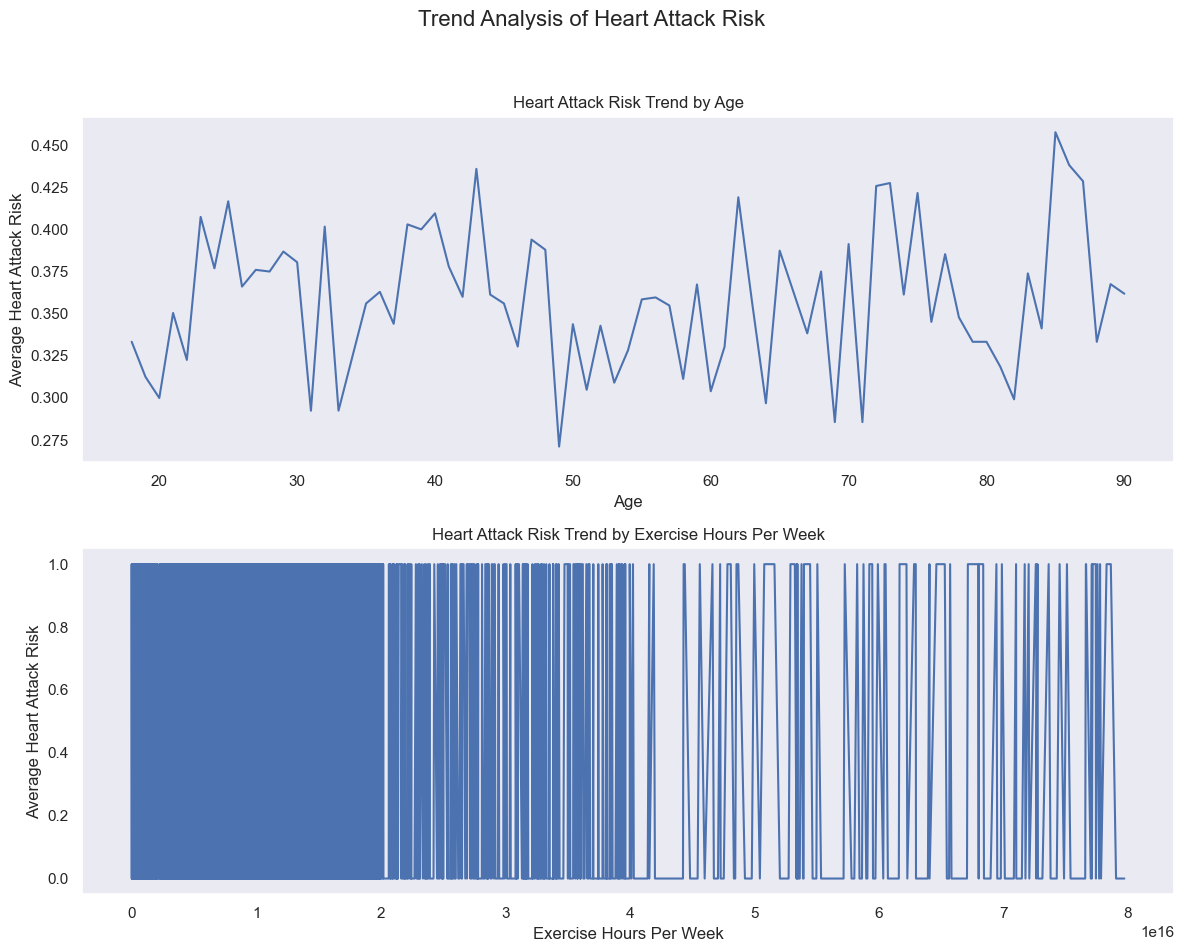

In [161]:
# Set up the overall figure for trend analysis
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Trend Analysis of Heart Attack Risk', fontsize=16)

# a. Age vs. Heart Attack Risk (Line Chart)
sns.lineplot(data=HAD_data, x='Age', y='Heart Attack Risk', estimator='mean', errorbar=None, ax=axs[0])
axs[0].set_title('Heart Attack Risk Trend by Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Average Heart Attack Risk')
axs[0].grid()

# b. Exercise Hours Per Week vs. Heart Attack Risk (Line Chart)
sns.lineplot(data=HAD_data, x='Exercise Hours Per Week', y='Heart Attack Risk', estimator='mean', errorbar=None, ax=axs[1])
axs[1].set_title('Heart Attack Risk Trend by Exercise Hours Per Week')
axs[1].set_xlabel('Exercise Hours Per Week')
axs[1].set_ylabel('Average Heart Attack Risk')
axs[1].grid()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to accommodate the title
plt.show()

## Using correlation analysis to identify and measure 
the strength and direction of linear relationships among the chosen features, giving insight into which factors are most strongly associated 
with heart attack risk.

 Selecting only the relevant numerical columns for correlation analysis and
 Filtering out any non-numeric columns (i.e. categorical columns)

Correlation Matrix:
                              Age  Cholesterol  Heart Rate       BMI  \
Age                      1.000000    -0.009107   -0.003844  0.012240   
Cholesterol             -0.009107     1.000000    0.000315 -0.020553   
Heart Rate              -0.003844     0.000315    1.000000 -0.008234   
BMI                      0.012240    -0.020553   -0.008234  1.000000   
Alcohol Consumption     -0.006666    -0.007261    0.003459  0.006014   
Exercise Hours Per Week  0.018862    -0.013979    0.003228 -0.004681   
Heart Attack Risk        0.006403     0.019340   -0.004251 -0.007430   

                         Alcohol Consumption  Exercise Hours Per Week  \
Age                                -0.006666                 0.018862   
Cholesterol                        -0.007261                -0.013979   
Heart Rate                          0.003459                 0.003228   
BMI                                 0.006014                -0.004681   
Alcohol Consumption                 1.

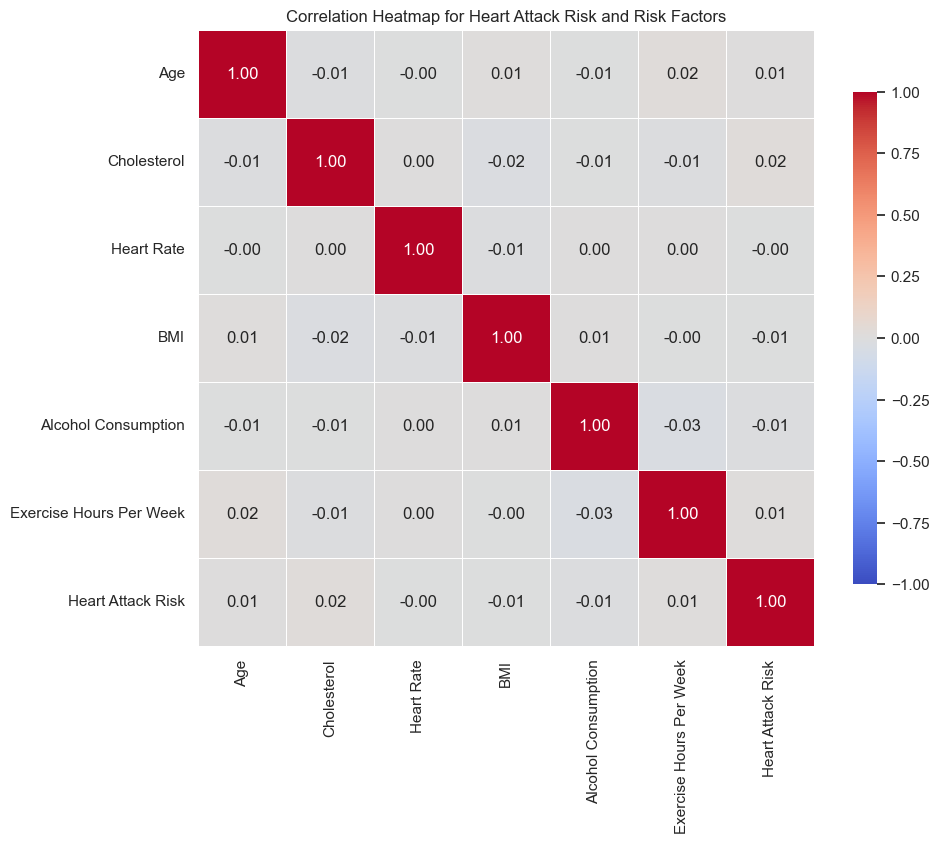

In [135]:

features_of_interest = [
    'Age', 
    'Cholesterol', 
    'Heart Rate', 
    'BMI', 
    'Alcohol Consumption', 
    'Exercise Hours Per Week', 
    'Heart Attack Risk'
]

# Subset the dataframe to only include the numeric columns
correlation_data = HAD_data_reduced[features_of_interest].apply(pd.to_numeric, errors='coerce')
correlation_data = correlation_data.dropna()  # Drop rows with NaN values after conversion

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr(method='pearson')

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap for Heart Attack Risk and Risk Factors')
plt.show()

 where positive correlations are in red and negative correlations in blue.

## Interpretations
Age, Cholesterol, Heart Rate, BMI: These variables show weak correlations with heart attack risk, ranging from -0.007 to 0.019, 
indicating minimal linear relationships.
Alcohol Consumption: Slight negative correlation (-0.014) suggests no significant association with heart attack risk.
Exercise Hours Per Week: Shows a weak positive correlation (0.011), again indicating no strong relationship with heart attack risk.
Overall, none of the features demonstrate a strong correlation with heart attack risk, suggesting that other factors 
may significantly influence heart health, or the dataset may not capture these relationships effectively.

In [204]:
HAD_data_reduced.to_csv("Heart_Attack_Risk_Analysis.csv")